In [3]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# image manipulation
from PIL import Image

# sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

#tensorflow
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


In [7]:
image_dir = os.path.join(os.path.expanduser('~'), 'Downloads', 'images')
target_size = (224, 224)
resized_images = []
image_names = []

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        file_path = os.path.join(image_dir, filename)
        image = Image.open(file_path)
    
        rgb_image = image.convert('RGB') # converts image to RGB (jpg -> RGB, png -> RGBA)
        resized_image = rgb_image.resize(target_size)
        
        resized_images.append(resized_image) #records resized images
        image_names.append(filename[:-4]) #records names of resized images
        
print(f'✅ Resized {len(resized_images)} images in total!')

✅ Resized 627 images in total!


In [5]:
images_arr = []
for image in resized_images:
    images_arr.append(np.array(image))
    
images_arr = np.array(images_arr)
images_arr.shape

(627, 224, 224, 3)

In [4]:
file_path = os.path.join(os.path.expanduser('~'), 'code', 'jackanichp', 'pill_pic', 'data_collection', 'directory_consumer_grade_images.xlsx')
data = pd.read_excel(file_path)

#Create a dataframe using only the images that were downloaded and resized
image_names = [int(name) for name in image_names] #convert image names to int
index_exists = data.index.isin(image_names) #create a boolean index of the image names that exist in the dataframe
data = data.loc[index_exists] #create a new dataframe with only the images that have been resized
data.tail(3)

,NDC11,Part,Image,Layout,Name
118421,63459070160,1,PillProjectDisc90/images/I8IP8T6CW_VUGZZYPH30_...,MC_COOKED_CALIBRATED_V1.2,amrix
118422,63459070160,1,PillProjectDisc97/images/ODUQGLEEXJEAR-FL18J81...,MC_COOKED_CALIBRATED_V1.2,AMRIX CAP 30MG
118423,63459070160,1,PillProjectDisc109/images/ZM0EPASCAX7UJM82D8KD...,MC_SPL_SPLIMAGE_V3.0,amrix


In [5]:
# how many images are there for each pill?
data['Name'].value_counts()

Name
NORTEL 7/7/7          130
TRI-LEGEST Fe         130
TRIVORA TAB           124
AMARYL 4MG TABLETS    113
AMRIX CAP 30MG         98
amrix                  32
Name: count, dtype: int64

In [6]:
encoder = OrdinalEncoder() # Instanciate One hot encoder
encoder.fit(data[['NDC11']])
encoder.categories_

[array([   39022310,   555901258,   555903270, 52544029128, 63459070160])]

In [7]:
data['encoded_NDC11'] = encoder.fit_transform(data[['NDC11']])
data['encoded_NDC11'].value_counts()

encoded_NDC11
1.0    130
2.0    130
4.0    130
3.0    124
0.0    113
Name: count, dtype: int64

In [8]:
data

,NDC11,Part,Image,Layout,Name,encoded_NDC11
4012,39022310,1,PillProjectDisc101/images/SJXCIJRES6KNA9ZDT_-K...,C3PI_Test,AMARYL 4MG TABLETS,0.0
4013,39022310,1,PillProjectDisc102/images/SP-OD1GXRZLA6IWII1_V...,C3PI_Test,AMARYL 4MG TABLETS,0.0
4014,39022310,1,PillProjectDisc102/images/SWD_C6IFGYEK2T_XKO!M...,C3PI_Test,AMARYL 4MG TABLETS,0.0
4015,39022310,1,PillProjectDisc102/images/TE_HLK5O_X36EBW96ERB...,C3PI_Test,AMARYL 4MG TABLETS,0.0
4016,39022310,1,PillProjectDisc103/images/TM4CBGZP30QTP885E2!1...,C3PI_Test,AMARYL 4MG TABLETS,0.0
...,...,...,...,...,...,...
118419,63459070160,1,PillProjectDisc49/images/BVSJUMXA_2YYIA9FWAZP2...,MC_COOKED_CALIBRATED_V1.2,amrix,4.0
118420,63459070160,1,PillProjectDisc57/images/CA4VW8H6_G6B36O_99TJW...,MC_COOKED_CALIBRATED_V1.2,AMRIX CAP 30MG,4.0
118421,63459070160,1,PillProjectDisc90/images/I8IP8T6CW_VUGZZYPH30_...,MC_COOKED_CALIBRATED_V1.2,amrix,4.0
118422,63459070160,1,PillProjectDisc97/images/ODUQGLEEXJEAR-FL18J81...,MC_COOKED_CALIBRATED_V1.2,AMRIX CAP 30MG,4.0


In [9]:
# Normalization of pixel values to be between 0 and 1
images_arr = images_arr / 255.0

In [10]:
images_arr.shape

(627, 224, 224, 3)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(images_arr, data['encoded_NDC11'], test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3) 

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}\nX_val shape: {X_val.shape}, y_val shape: {y_val.shape}\nX_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (306, 224, 224, 3), y_train shape: (306,)
X_val shape: (132, 224, 224, 3), y_val shape: (132,)
X_test shape: (189, 224, 224, 3), y_test shape: (189,)


In [12]:
y_train = to_categorical(y_train.values)
y_val = to_categorical(y_val.values)
y_test = to_categorical(y_test.values)

In [31]:
baseline_model = 0.2

In [42]:
images_flat = images_arr.reshape(images_arr.shape[0], -1)
images_flat.shape

(627, 150528)

In [45]:
pca = PCA(n_components=150)
projected_images = pca.fit_transform(images_flat)
projected_images.shape

(627, 150)

In [46]:
pca.components_.shape

(150, 150528)

In [49]:
pca.components_[0].shape, pca.components_[1].shape, pca.components_[2].shape

((150528,), (150528,), (150528,))

In [50]:
reconstructed_images = pca.inverse_transform(projected_images)
reconstructed_images.shape

(627, 150528)

In [58]:
# Plotting a reconstructed image
#plt.imshow(reconstructed_images[0].reshape(224, 224, 3))

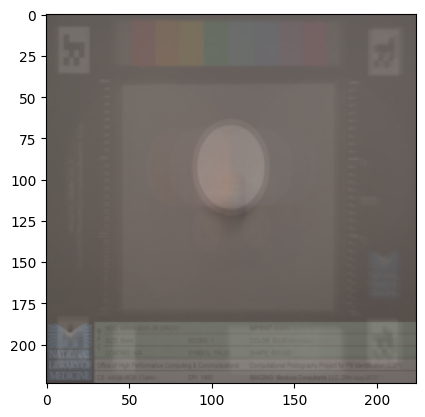

In [64]:
# Mean pill of the whole image set
plt.imshow(pca.mean_.reshape(224, 224, 3));